<a href="https://colab.research.google.com/github/Garbass99/Room-Occopancy-Prediction/blob/main/RoomOcupancy_Prediction/notebook/RoomOccupacy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import os
from datetime import datetime
import joblib

In [4]:
%%writefile Garba.py

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import os
from datetime import datetime
import joblib

#Project Builder

def Projfolder(maindirect, projName, folderindx):
    ''' this is the function for nuilding project just provide the maindirectory, project name as projName then the folder index
    as folderindx ranging from [0,1,2,3,4,5,6] with respect to list ['data', 'outcome', 'notebook','transformations','resources', 'visualizations', 'model'].
    'ext' these the extension to which file type are you saving your file, excel xls, .csv, .pkl etc'''
    dirlist = ['data', 'outcome', 'notebook','transformations','resources', 'visualizations', 'model']
    os.chdir(maindirect)
    os.makedirs(projName)
    newDir = maindirect + "/" + projName

    os.chdir(newDir)

    for index in folderindx:
        os.makedirs(dirlist[index])
#fileloader


#Fileloader
def fileloder(path, fileName, ext):
    '''Fileloader this function i build to help access and load data from the directory given as 'path',
    provide path, filename adnd the extention to read file'''
    if ext == '.csv':
        return pd.read_csv(path + '/'+fileName+ ext)
    elif ext == 'xlsx' or 'xls':
        return pd.read_xlsx(path + '/'+fileName+ ext)

#Checking for overall information of the data
''' Checking data information, pass data to function to see the information'''
def DataInformation(data):
    info = data.info()
    return info

#Checking trend view of all the features in a data agains time
def Trendview(data, date_column, path, filename):
    """
    Plot trends for all numeric features in the dataset against the specified date column.

    Parameters:
    - data (DataFrame): The dataset containing the features to plot.
    - date_column (str): The column name representing dates.

    Returns:
    - None
    """
    # Ensure the date column is converted to datetime
    date_column = pd.to_datetime(date_column)



    if date_column in data.columns:  # Check if date_column exists in DataFrame
            date_column = pd.to_datetime(date_column)
    else:
        raise KeyError(f"'{date_column}' not found in DataFrame columns.")


        numeric_features = data.select_dtypes(include=["number"]).columns


        # Plot each numeric feature against the date column
        plt.figure(figsize=(12, 6))
        for feature in numeric_features:
            sn.lineplot(x=data[date_column], y=data[feature], label=feature)

        # Add labels, title, and rotation for clarity
        plt.title('Trends of Features Over Time')
        plt.xlabel('Date')
        plt.ylabel('Values')
        plt.xticks(rotation=45)
        plt.legend(title="Features")
        filename = 'Trends of features Over time'
        path = r"C:\Users\DELL\Desktop\TECHTERN 01\RoomOcupancy_Prediction\visualizations"
        plt.savefig(path + '/' + filename + '.png')
        plt.show()


#Working with datatime to identify triends by segregating by Date, Year, Month, days and Hour
def date_converter(data,datecol):
    datecol= pd.to_datetime(datecol, format="%m/%d/%Y %H:%M")
    data['date_only'] = datecol.dt.date
    data['Year'] = datecol.dt.year
    data['Month'] = datecol.dt.month
    data['Day'] = datecol.dt.day
    data['Hours'] = datecol.dt.hour
   # data2 = os.join.path(data,
   #

#this function i make to simplify ploting triends of feature over period of time
def trendplotcolumn(data, path, filename, datecolumn, feature):
    '''This function help you view trend of a feature againd a date feature,
    simply pass the data, path to save, filename to save with, the date column, and the single feature you want to view over time'''
    sn.lineplot(x= datecolumn, y = feature)
    plt.title('trend of Feature over time')
    plt.xlabel('date')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.savefig(path + '/' + filename + '.png')
    plt.show()
#trendline with single feature
def trendplotcolumn(data, path, filename, datecolumn, feature):
    '''This is a function that plot your trend of a perticular feature abd a date column to study trend overt time'''
    sn.lineplot(x= datecolumn, y = feature)
    plt.title('trend of Feature over time')
    plt.xlabel('date')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.savefig(path + '/' + filename + '.png')
    plt.show()

#checking for missing values
def Missingvals(data):
    ''' this is a helperfuction to detect missing values
    Pass the data to see the missing values'''

    missing = data.isna().sum()
    return missing



def Outlierdetect(data, savepath, filename):
    #Checking for Outliers in the data
    '''Outlierdetect Outliers detector detects the graphical representtation of the Outliers in the data
    Pass the data to the function'''
    Outlier = data.plot(kind='box', subplots = True, layout = (4,4), sharey = False, sharex = False)
    plt.gcf().set_size_inches(20,20)
    plt.savefig(savepath +'/' + filename+ '.png')
    plt.show()
    plt.close()
    return Outlier

def VisualSkewdetect(data, savepath, filename):
    #Checking for Outliers in the data
    '''Visually detect show skewed the distribution of your numeric features.
    Pass the data to the function'''
    skew = data.plot(kind='density', subplots = True, layout = (4,4), sharey = False, sharex = False)
    plt.gcf().set_size_inches(20,20)
    plt.savefig(savepath +'/' + filename+ '.png')
    plt.show()
    plt.close()
    return skew



def duplicatesdetect(file,savepath,filename, ext ):
    #checking for duplicates in the data
    r'''duplicatesdetect detecting and saving duplicates in the data
    import duplicatesdetect() and pass the data
    file = name of the data you want to check duplicate
    savepath = the path to save the duplicates before droping e.g r"C:\Users\DELL\Desktop\TECHTERN 01\RoomOcupancy_Prediction\output
    ext = the extension it should be either csv or xlsx'''

    duplicate = file[file.duplicated()]
    if ext =='.csv':
        duplicate.to_csv(savepath +'/' + filename+ ext)
    elif ext =='.xlsx' or 'xls':
        duplicate.to_xlsx(savepath + '/' + filename + ext)

    return duplicate
#checking for the descriptive statistics of the continues variables

def Descriptivestat(data):
    ''' This diplays the Descrptivestat descriptive Statistics of this data
    pass the data to the function'''
    descrptive = data.describe()
    return descrptive

def duptreatment(data):
    ''' call the function and pass your data to treat duplicates by dropping the second duplicate values and keeping the first copy'''

    Nodups = data.drop_duplicates()
    return Nodups


def Correlation_Coef(data,path, fileName, ext):
    ''' Pass the required
    data= name of file
    path = save path
    filename = save name
    ext = extension of the file'''
    plt.figure(figsize=(10,10))
    sn.heatmap(corrilation_matrix, annot = True)
    plt.title("Correlation of Room Occupancy Data")
    plt.savefig(path + "/" + fileName + ext)
    plt.show()


#Saving data without files
def fileSaver(file, fileName, dest, ext = '.csv'):
    '''This is a helper function that help save files of different extensions with timestamp
    Provide and assign a variable name to the file wanted to save, then the name you want to save it with as fileName, then destination where you want it to be save as Dest, then lastly the extension as ext'''
    curTime = datetime.now()
    strtime = curTime.strftime('%d-%m-%y %H-%M-%S')
    file.to_csv(dest + '/'+ fileName + strtime + ext)





Overwriting Garba.py


In [5]:
#importing the moduke i created for basic data cleaning, visualiation and folder/file manipulations
import Garba as gb

In [6]:
help(gb)

Help on module Garba:

NAME
    Garba

FUNCTIONS
    Correlation_Coef(data, path, fileName, ext)
        Pass the required 
        data= name of file
        path = save path
        filename = save name
        ext = extension of the file
    
    DataInformation(data)
    
    Descriptivestat(data)
        This diplays the Descrptivestat descriptive Statistics of this data 
        pass the data to the function
    
    Missingvals(data)
        this is a helperfuction to detect missing values
        Pass the data to see the missing values
    
    Outlierdetect(data, savepath, filename)
        Outlierdetect Outliers detector detects the graphical representtation of the Outliers in the data
        Pass the data to the function
    
    Projfolder(maindirect, projName, folderindx)
        this is the function for nuilding project just provide the maindirectory, project name as projName then the folder index 
        as folderindx ranging from [0,1,2,3,4,5,6] with respect to list [

In [9]:
#Loading csv file

path = r"C:\Users\DELL\Desktop\TECHTERN 01\RoomOcupancy_Prediction\data"
fileName ='rmOccupancy'
ext = '.csv'
df = gb.fileloder(path, fileName, ext)

SyntaxError: invalid syntax (<ipython-input-9-d8369878ffb2>, line 3)

In [10]:
df2 = pd.read_csv("https://github.com/Garbass99/Room-Occopancy-Prediction/blob/main/RoomOcupancy_Prediction/data/rmOccupancy.csv")

ParserError: Error tokenizing data. C error: Expected 1 fields in line 42, saw 61


In [ ]:
#picking the head of the data
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/11/2015 14:48,21.7600,31.133333,437.333333,1029.666667,0.005021,1
1,2/11/2015 14:49,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,2/11/2015 14:50,21.7675,31.122500,434.000000,1003.750000,0.005022,1
3,2/11/2015 14:51,21.7675,31.122500,439.000000,1009.500000,0.005022,1
4,2/11/2015 14:51,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [ ]:
#picking the tail of the data
df.tail()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
9747,2/18/2015 9:15,20.815,27.7175,429.75,1505.25,0.004213,1
9748,2/18/2015 9:16,20.865,27.7450,423.50,1514.50,0.004230,1
9749,2/18/2015 9:16,20.890,27.7450,423.50,1521.50,0.004237,1
9750,2/18/2015 9:17,20.890,28.0225,418.75,1632.00,0.004279,1
9751,2/18/2015 9:19,21.000,28.1000,409.00,1864.00,0.004321,1


In [ ]:
df.size

68264

In [ ]:
df.shape

(9752, 7)

In [ ]:
#Checking for the data information
gb.DataInformation(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9752 entries, 0 to 9751
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 533.4+ KB


In [ ]:
gb.Descriptivestat(df).T

,count,mean,std,min,25%,50%,75%,max
Temperature,9752.0,21.001768,1.020693,19.500000,20.290000,20.790000,21.533333,24.390000
Humidity,9752.0,29.891910,3.952844,21.865000,26.642083,30.200000,32.700000,39.500000
Light,9752.0,123.067930,208.221275,0.000000,0.000000,0.000000,208.250000,1581.000000
CO2,9752.0,753.224832,297.096114,484.666667,542.312500,639.000000,831.125000,2076.500000
HumidityRatio,9752.0,0.004589,0.000531,0.003275,0.004196,0.004593,0.004998,0.005769
Occupancy,9752.0,0.210111,0.407408,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
#Checking for missing Values
gb.Missingvals(df)

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [ ]:
#Checking for duplicat values in the data
ext = '.csv'
filename = 'duplicates'
savepath = r"C:\Users\DELL\Desktop\TECHTERN 01\RoomOcupancy_Prediction\Output"
data =df
gb.duplicatesdetect(data, savepath, filename, ext)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
2479,2/13/2015 8:06,21.00,25.500,14.0,522.0,0.003918,0
3199,2/13/2015 20:06,20.70,31.790,0.0,515.0,0.004802,0
3777,2/14/2015 5:44,19.60,38.290,0.0,506.0,0.005409,0
3784,2/14/2015 5:51,19.60,38.290,0.0,504.5,0.005409,0
4266,2/14/2015 13:53,20.50,35.400,37.0,509.0,0.005286,0
4476,2/14/2015 17:23,20.00,35.590,14.0,520.0,0.005152,0
4643,2/14/2015 20:10,19.79,35.500,0.0,524.0,0.005072,0
4767,2/14/2015 22:14,19.89,35.700,0.0,530.0,0.005132,0
4787,2/14/2015 22:34,19.84,36.000,0.0,534.0,0.005160,0
4791,2/14/2015 22:38,19.89,36.000,0.0,535.0,0.005176,0


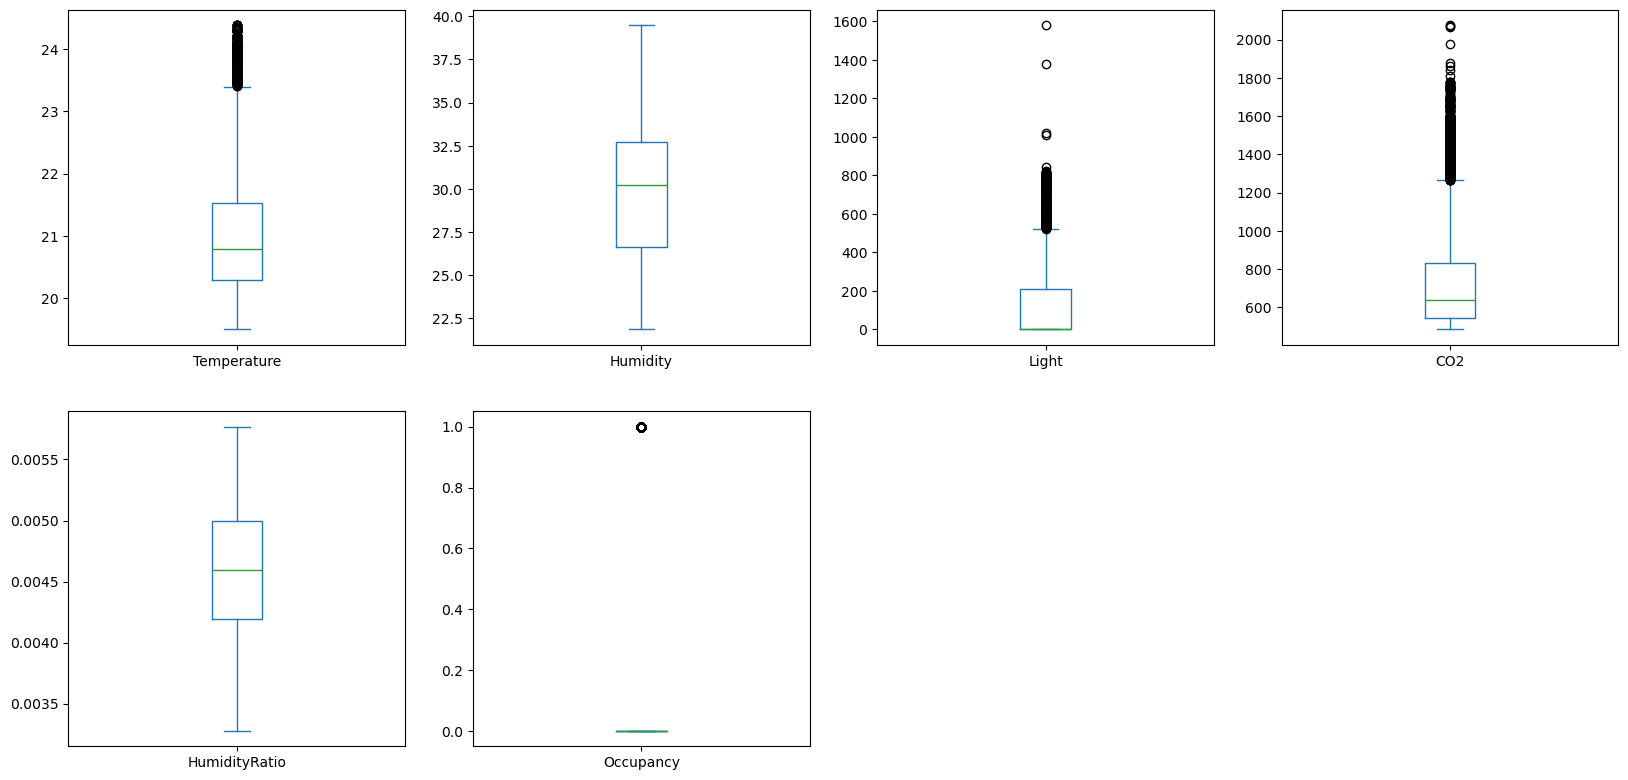

Temperature         Axes(0.125,0.712609;0.168478x0.167391)
Humidity         Axes(0.327174,0.712609;0.168478x0.167391)
Light            Axes(0.529348,0.712609;0.168478x0.167391)
CO2              Axes(0.731522,0.712609;0.168478x0.167391)
HumidityRatio       Axes(0.125,0.511739;0.168478x0.167391)
Occupancy        Axes(0.327174,0.511739;0.168478x0.167391)
dtype: object

In [ ]:
#checking and saving outliers
data = df
savepath = r"C:\Users\DELL\Desktop\TECHTERN 01\RoomOcupancy_Prediction\visualizations"
filename= 'Outliers'
gb.Outlierdetect(data, savepath, filename)

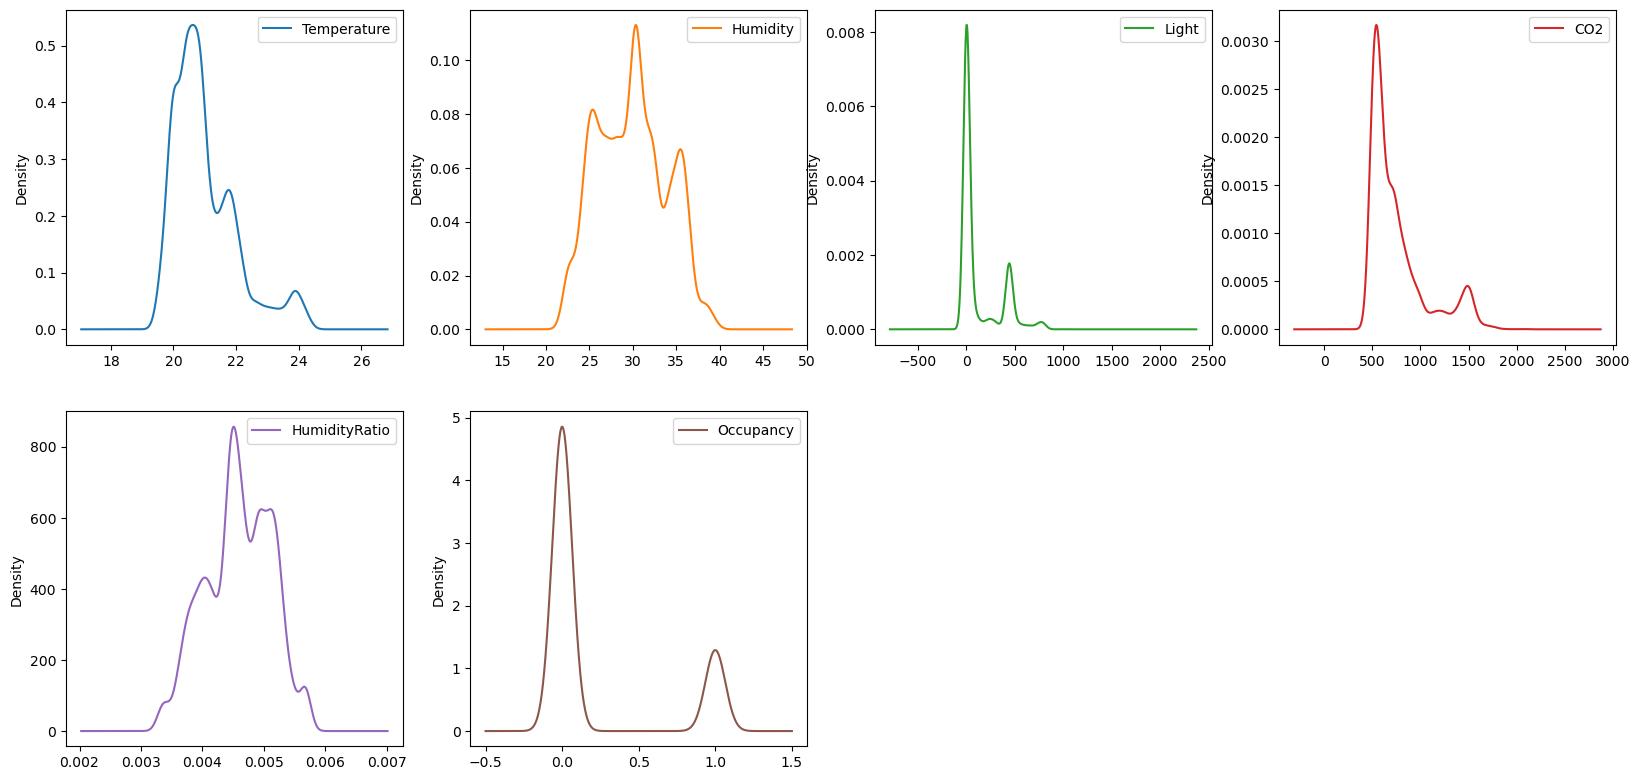

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

In [ ]:
#visualy looking at how skwed is the data
data = df
savepth = r"C:\Users\DELL\Desktop\TECHTERN 01\RoomOcupancy_Prediction\visualizations"
filename = 'skewed visualisation'
gb.VisualSkewdetect(data, savepath, filename)

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
#checking at the values counts of the outcome variable
df.Occupancy.value_counts()

Occupancy
0    7703
1    2049
Name: count, dtype: int64

Trend View of all features Over Time

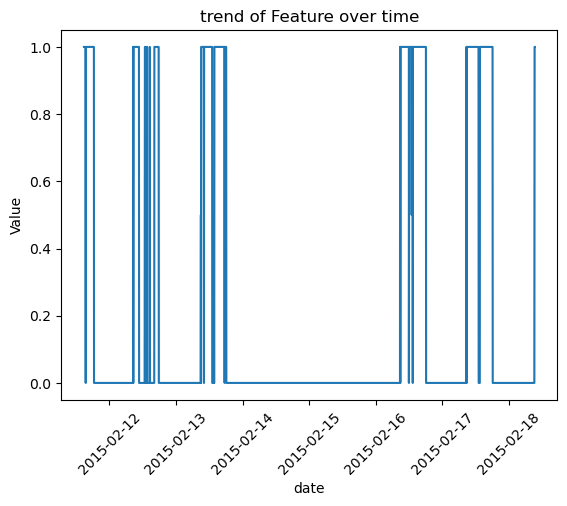

In [ ]:
#importing trendline to view dred of occopancy overtime before cleaning the data
data = df
datecolumn = df['date']
feature = df['Occupancy']
filename = 'Trend of occupancy and date'
path = r"C:\Users\DELL\Desktop\TECHTERN 01\RoomOcupancy_Prediction\visualizations"
gb.trendplotcolumn(data, path, filename, datecolumn, feature)

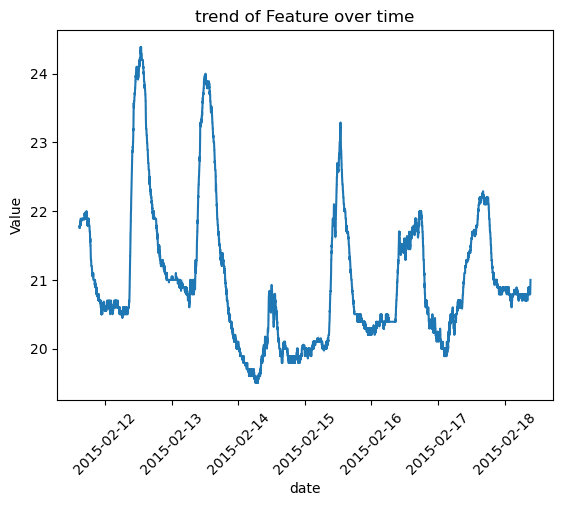

In [ ]:
data = df
datecolumn = df['date']
feature = df['Temperature']
filename = 'Trend of Temperature and date'
path = r"C:\Users\DELL\Desktop\TECHTERN 01\RoomOcupancy_Prediction\visualizations"
gb.trendplotcolumn(data, path, filename, datecolumn, feature)

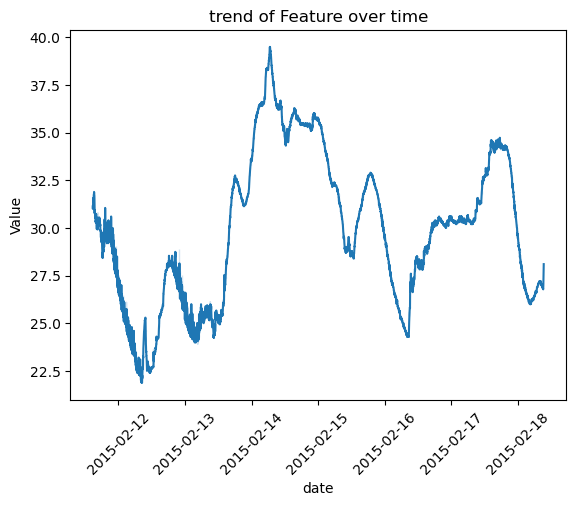

In [ ]:
data = df
datecolumn = df['date']
feature = df['Humidity']
filename = 'Trend of Room over time'
path = r"C:\Users\DELL\Desktop\TECHTERN 01\RoomOcupancy_Prediction\visualizations"
gb.trendplotcolumn(data, path, filename, datecolumn, feature)


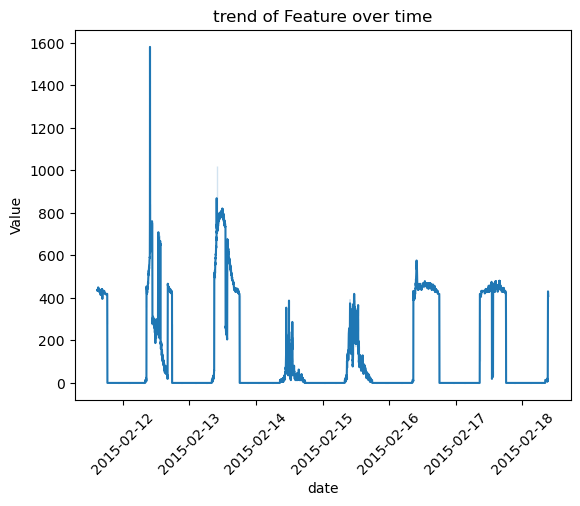

In [ ]:
data = df
datecolumn = df['date']
feature = df['Light']
filename = 'Trend of Light in a Room over time'
path = r"C:\Users\DELL\Desktop\TECHTERN 01\RoomOcupancy_Prediction\visualizations"
gb.trendplotcolumn(data, path, filename, datecolumn, feature)


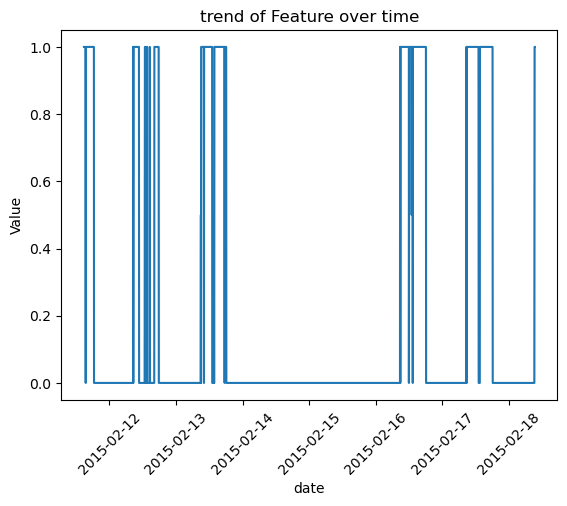

In [ ]:
data = df
datecolumn = df['date']
feature = df['Occupancy']
filename = 'Trend of occupancy and date'
path = r"C:\Users\DELL\Desktop\TECHTERN 01\RoomOcupancy_Prediction\visualizations"
gb.trendplotcolumn(data, path, filename, datecolumn, feature)

'''Observations:
1. No missing values in the data
2. we have number of duplicates values that needs to be treated before making analysis and
and building model
3. We are having outliers in Light, CO2 and Tempreture feature befor still checking at our or skewness and treating if need arises
4. The data needs rescalling looking at the distribution from the minimum and maximum is very wide and needs to be recalled
5. The data also need to to be standadize to 0 and 1
6. The data also must be Normalized looking at the distribution accross all features from minimum value to maximum value of distribution,
the logical values and the mean value not identical to the 50th percentile value.'''

Treating Errors in the Data

In [ ]:
#drop duplicates
df = gb.duptreatment(df)

In [ ]:
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
1,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
3,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
4,2015-02-11 14:51:00,21.7900,31.133333,437.333333,1005.666667,0.005030,1
...,...,...,...,...,...,...,...
9747,2015-02-18 09:15:00,20.8150,27.717500,429.750000,1505.250000,0.004213,1
9748,2015-02-18 09:16:00,20.8650,27.745000,423.500000,1514.500000,0.004230,1
9749,2015-02-18 09:16:00,20.8900,27.745000,423.500000,1521.500000,0.004237,1
9750,2015-02-18 09:17:00,20.8900,28.022500,418.750000,1632.000000,0.004279,1


In [ ]:
df.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [ ]:
#Saving data without duplicates
def fileSaver(file, fileName, dest, ext = '.csv'):
    curTime = datetime.now()
    strtime = curTime.strftime('%d-%m-%y %H-%M-%S')
    file.to_csv(dest + '/'+ fileName + strtime + ext)



In [ ]:
#Saving data set after droping duplicates
file=df
filename = 'no dups'
Dest = r"C:\Users\DELL\Desktop\TECHTERN 01\RoomOcupancy_Prediction\output"
ext = '.csv'
fileSaver(file, fileName, Dest, ext)

In [ ]:
#loading the above save data
os.chdir( r"C:\Users\DELL\Desktop\TECHTERN 01\RoomOcupancy_Prediction")
dfn_d = pd.read_csv('output/no dups05-02-25 16-39-5205-02-25 23-03-24.csv', index_col=0)

dfn_d

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
1,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
3,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
4,2015-02-11 14:51:00,21.7900,31.133333,437.333333,1005.666667,0.005030,1
...,...,...,...,...,...,...,...
9747,2015-02-18 09:15:00,20.8150,27.717500,429.750000,1505.250000,0.004213,1
9748,2015-02-18 09:16:00,20.8650,27.745000,423.500000,1514.500000,0.004230,1
9749,2015-02-18 09:16:00,20.8900,27.745000,423.500000,1521.500000,0.004237,1
9750,2015-02-18 09:17:00,20.8900,28.022500,418.750000,1632.000000,0.004279,1


In [ ]:
#sergregating categorica and continues variable
#def dtypesseparator(dfn_d):
Cont_vers = dfn_d.select_dtypes('float')
cat_ver = dfn_d.select_dtypes('object')


In [ ]:
#Treating ouliers
def outliers_limit(col): #creating a function to determing the upper limit and the lower limit of our IQR
    q3,q1 = np.percentile (col, [75,25])
    iqr = q3-q1
    upper_limit = q3 + 1.5*iqr
    Lower_Limit = q1 - 1.5*iqr
    return upper_limit,Lower_Limit

In [ ]:
for col in Cont_vers:
    print("----------------------------------------------")
    print("Column:", col)
    UL,LL = outliers_limit (dfn_d[col])
    print("Upper Limit = ",UL)
    print("Lower Limit = ",LL)
    total_outliers = len(dfn_d.loc[dfn_d[col]<LL,col]) + len(dfn_d.loc[dfn_d[col]>UL,col])
    percent = (total_outliers/len(dfn_d.index))*100
    print("percentage of outliers=",percent )
    print("----------------------------------------------/n")

----------------------------------------------
Column: Temperature
Upper Limit =  23.398333325000003
Lower Limit =  18.425000004999994
percentage of outliers= 4.925449871465296
----------------------------------------------/n
----------------------------------------------
Column: Humidity
Upper Limit =  41.80999999500001
Lower Limit =  17.516666674999993
percentage of outliers= 0.0
----------------------------------------------/n
----------------------------------------------
Column: Light
Upper Limit =  525.0
Lower Limit =  -315.0
percentage of outliers= 4.359897172236503
----------------------------------------------/n
----------------------------------------------
Column: CO2
Upper Limit =  1265.0
Lower Limit =  109.0
percentage of outliers= 10.282776349614396
----------------------------------------------/n
----------------------------------------------
Column: HumidityRatio
Upper Limit =  0.006199314000000001
Lower Limit =  0.0029935059999999995
percentage of outliers= 0.0
-------

In [ ]:
for col in list(Cont_vers):
    UL, LL = outliers_limit(dfn_d[col])
    dfn_d.loc[dfn_d[col] < LL, col]=np.nan
    dfn_d.loc[dfn_d[col] > UL, col]=np.nan
dfn_d.dropna(subset = ['Temperature','Light','CO2'], inplace=True)
dfn_d.reset_index(drop=True, inplace=True)

In [ ]:
dfn_d

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
1,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
3,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
4,2015-02-11 14:51:00,21.7900,31.133333,437.333333,1005.666667,0.005030,1
...,...,...,...,...,...,...,...
8037,2015-02-18 03:13:00,20.7900,26.500000,0.000000,1256.500000,0.004020,0
8038,2015-02-18 03:14:00,20.7900,26.500000,0.000000,1257.500000,0.004020,0
8039,2015-02-18 03:15:00,20.7900,26.500000,0.000000,1261.000000,0.004020,0
8040,2015-02-18 03:16:00,20.7900,26.445000,0.000000,1264.000000,0.004012,0


In [ ]:
def fileSaver(file, fileName, dest, ext = '.csv'):
    curTime = datetime.now()
    strtime = curTime.strftime('%d-%m-%y %H-%M-%S')
    file.to_csv(dest + '/'+ fileName + strtime + ext)


In [ ]:
#Saving data set after droping Outliers
file= dfn_d
fileName = 'no outlr'
Dest = r"C:\Users\DELL\Desktop\TECHTERN 01\RoomOcupancy_Prediction\output"
ext = '.csv'
fileSaver(file, fileName, Dest, ext)

In [ ]:
#checking current directory
os.getcwd()

'C:\\Users\\DELL\\Desktop\\TECHTERN 01\\RoomOcupancy_Prediction'

In [ ]:
#Reading the saved data without missing values, duplicate and outliers
os.chdir(r'C:\Users\DELL\Desktop\TECHTERN 01\RoomOcupancy_Prediction')
dfn_doul = pd.read_csv('output/no outlr06-02-25 09-39-48.csv', index_col=0)

In [ ]:
print(type(dfn_doul))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
corrilation_matrix = dfn_doul.drop(columns = ["date"]).corr()

In [ ]:
corrilation_matrix

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.432644,0.640031,0.332064,-0.055775,0.537187
Humidity,-0.432644,1.000000,-0.084993,-0.242625,0.923760,-0.082434
Light,0.640031,-0.084993,1.000000,0.481764,0.179400,0.946171
CO2,0.332064,-0.242625,0.481764,1.000000,-0.114904,0.505596
HumidityRatio,-0.055775,0.923760,0.179400,-0.114904,1.000000,0.139249
Occupancy,0.537187,-0.082434,0.946171,0.505596,0.139249,1.000000


In [ ]:
def Correlation_Coef(data,path, fileName, ext):
    plt.figure(figsize=(10,10))
    sn.heatmap(corrilation_matrix, annot = True)
    plt.title("Correlation of Room Occupancy Data")
    plt.savefig(path + "/" + fileName + ext)
    plt.show()

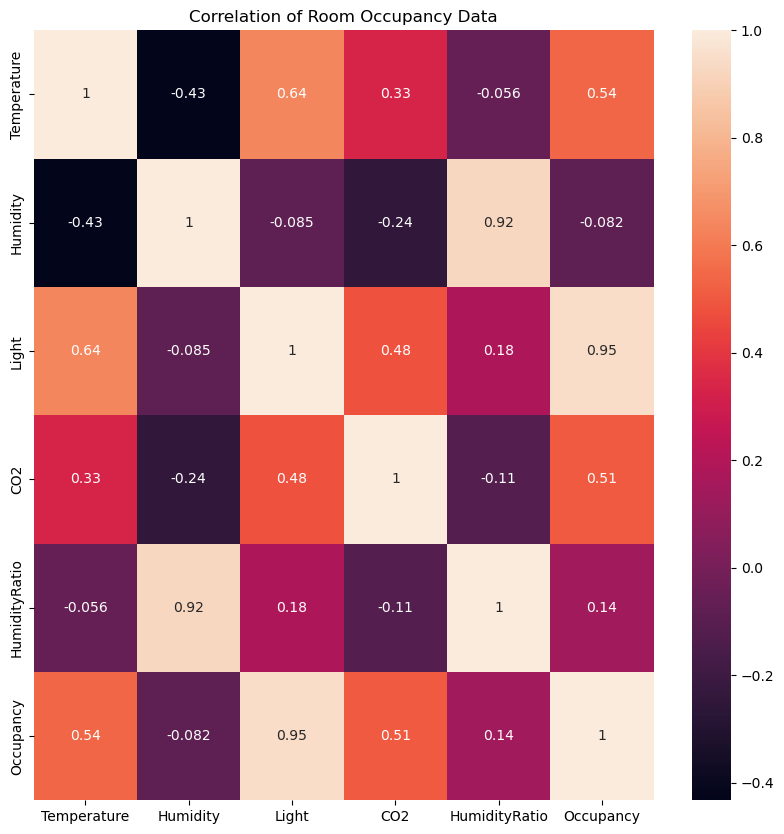

In [ ]:
#correlation coefficient of the Room Occupancy data
data = dfn_doul
path = r"C:\Users\DELL\Desktop\TECHTERN 01\RoomOcupancy_Prediction\visualizations"
fileName = 'Corr_coef'
ext = '.png'
Correlation_Coef(data,path, fileName, ext)

In [ ]:
#Dropping the hihly correlated value
dfn_doul.drop(columns =[ 'HumidityRatio', 'date'], inplace = True)

In [ ]:
dfn_doul

,Temperature,Humidity,Light,CO2,Occupancy
0,21.7600,31.133333,437.333333,1029.666667,1
1,21.7900,31.000000,437.333333,1000.000000,1
2,21.7675,31.122500,434.000000,1003.750000,1
3,21.7675,31.122500,439.000000,1009.500000,1
4,21.7900,31.133333,437.333333,1005.666667,1
...,...,...,...,...,...
8037,20.7900,26.500000,0.000000,1256.500000,0
8038,20.7900,26.500000,0.000000,1257.500000,0
8039,20.7900,26.500000,0.000000,1261.000000,0
8040,20.7900,26.445000,0.000000,1264.000000,0


In [ ]:
file = dfn_doul
fileName = 'dfn_corr'
dest = r"C:\Users\DELL\Desktop\TECHTERN 01\RoomOcupancy_Prediction\Transformations"
gb.fileSaver(file, fileName, dest, ext='.csv')

In [ ]:
os.getcwd()

'C:\\Users\\DELL\\Desktop\\TECHTERN 01\\RoomOcupancy_Prediction'

In [ ]:
os.chdir(r"C:\Users\DELL\Desktop\TECHTERN 01\RoomOcupancy_Prediction")

In [ ]:
df_clean = pd.read_csv("transformations\dfn_corr06-02-25 12-43-10.csv", index_col = 0)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DELL\AppData\Local\Temp\ipykernel_24304\4159430185.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_clean = pd.read_csv("transformations\dfn_corr06-02-25 12-43-10.csv", index_col = 0)


In [ ]:
df_clean

,Temperature,Humidity,Light,CO2,Occupancy
0,21.7600,31.133333,437.333333,1029.666667,1
1,21.7900,31.000000,437.333333,1000.000000,1
2,21.7675,31.122500,434.000000,1003.750000,1
3,21.7675,31.122500,439.000000,1009.500000,1
4,21.7900,31.133333,437.333333,1005.666667,1
...,...,...,...,...,...
8037,20.7900,26.500000,0.000000,1256.500000,0
8038,20.7900,26.500000,0.000000,1257.500000,0
8039,20.7900,26.500000,0.000000,1261.000000,0
8040,20.7900,26.445000,0.000000,1264.000000,0


In [ ]:
#Checking at the descriptive statistics of the data after treating errors
gb.Descriptivestat(df_clean)

,Temperature,Humidity,Light,CO2,Occupancy
count,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000
mean,20.761867,30.249200,91.138624,667.004308,0.171723
std,0.757984,3.815687,168.997381,175.013522,0.377163
min,19.500000,21.865000,0.000000,484.666667,0.000000
25%,20.200000,27.500000,0.000000,528.750000,0.000000
50%,20.600000,30.290000,0.000000,595.708333,0.000000
75%,21.256250,32.590000,53.000000,746.000000,0.000000
max,23.390000,39.500000,524.333333,1265.000000,1.000000


In [ ]:
cols = df_clean.columns
for col in cols:
    print(col, df_clean[col].unique())

Temperature [21.76       21.79       21.7675     21.815      21.89       21.82333333
 21.865      21.9175     21.96333333 21.9725     22.         21.945
 21.92666667 21.956      21.84       21.85666667 21.7        21.6
 21.63333333 21.55       21.5        21.39       21.29       21.245
 21.2        21.16666667 21.15       21.1        21.05       21.075
 21.         21.025      20.92666667 20.945      20.9725     20.89
 20.85666667 20.79       20.82333333 20.84       20.76       20.745
 20.7        20.7225     20.6        20.63333333 20.5        20.53333333
 20.55       20.56666667 20.65       20.575      20.66666667 20.625
 20.445      20.525      20.9175     21.2675     21.34       21.4175
 21.445      21.575      21.625      21.7225     22.1        23.39
 23.34       23.29       23.2        23.16666667 23.15       23.1
 23.05       23.03333333 23.         22.945      22.89       22.79
 22.745      22.76       22.7        22.6        22.55       22.56666667
 22.5        22.445      22

In [ ]:

dfArr = df_clean.values
Xr= dfArr[:,:-1]
yr=dfArr[:,-1]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
Scaler_m =MinMaxScaler()
df_scaled = Scaler_m.fit_transform(Xr)

In [ ]:
df_scaled = pd.DataFrame(Xr, columns = list(df_clean)[:-1])
df_scaled

,Temperature,Humidity,Light,CO2
0,21.7600,31.133333,437.333333,1029.666667
1,21.7900,31.000000,437.333333,1000.000000
2,21.7675,31.122500,434.000000,1003.750000
3,21.7675,31.122500,439.000000,1009.500000
4,21.7900,31.133333,437.333333,1005.666667
...,...,...,...,...
8037,20.7900,26.500000,0.000000,1256.500000
8038,20.7900,26.500000,0.000000,1257.500000
8039,20.7900,26.500000,0.000000,1261.000000
8040,20.7900,26.445000,0.000000,1264.000000


In [ ]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,8042.0,20.761867,0.757984,19.500000,20.20,20.600000,21.25625,23.390000
Humidity,8042.0,30.249200,3.815687,21.865000,27.50,30.290000,32.59000,39.500000
Light,8042.0,91.138624,168.997381,0.000000,0.00,0.000000,53.00000,524.333333
CO2,8042.0,667.004308,175.013522,484.666667,528.75,595.708333,746.00000,1265.000000


In [ ]:
dfArrs= df_scaled.values
Xs =dfArrs[:,:]
ys = dfArrs[:-1]

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
stdDF = Scaler.fit_transform(Xs)

In [ ]:
stdDF = pd.DataFrame(Xs,columns = list(df_clean)[:-1])
stdDF

,Temperature,Humidity,Light,CO2
0,21.7600,31.133333,437.333333,1029.666667
1,21.7900,31.000000,437.333333,1000.000000
2,21.7675,31.122500,434.000000,1003.750000
3,21.7675,31.122500,439.000000,1009.500000
4,21.7900,31.133333,437.333333,1005.666667
...,...,...,...,...
8037,20.7900,26.500000,0.000000,1256.500000
8038,20.7900,26.500000,0.000000,1257.500000
8039,20.7900,26.500000,0.000000,1261.000000
8040,20.7900,26.445000,0.000000,1264.000000


In [ ]:
stdDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,8042.0,20.761867,0.757984,19.500000,20.20,20.600000,21.25625,23.390000
Humidity,8042.0,30.249200,3.815687,21.865000,27.50,30.290000,32.59000,39.500000
Light,8042.0,91.138624,168.997381,0.000000,0.00,0.000000,53.00000,524.333333
CO2,8042.0,667.004308,175.013522,484.666667,528.75,595.708333,746.00000,1265.000000


In [ ]:
stdDF = pd.DataFrame(Xs,columns = list(df_clean)[:-1])
stdDF

,Temperature,Humidity,Light,CO2
0,21.7600,31.133333,437.333333,1029.666667
1,21.7900,31.000000,437.333333,1000.000000
2,21.7675,31.122500,434.000000,1003.750000
3,21.7675,31.122500,439.000000,1009.500000
4,21.7900,31.133333,437.333333,1005.666667
...,...,...,...,...
8037,20.7900,26.500000,0.000000,1256.500000
8038,20.7900,26.500000,0.000000,1257.500000
8039,20.7900,26.500000,0.000000,1261.000000
8040,20.7900,26.445000,0.000000,1264.000000


In [ ]:
stdDF['Occupancy'] = df_clean['Occupancy']
stdDF

,Temperature,Humidity,Light,CO2,Occupancy
0,21.7600,31.133333,437.333333,1029.666667,1
1,21.7900,31.000000,437.333333,1000.000000,1
2,21.7675,31.122500,434.000000,1003.750000,1
3,21.7675,31.122500,439.000000,1009.500000,1
4,21.7900,31.133333,437.333333,1005.666667,1
...,...,...,...,...,...
8037,20.7900,26.500000,0.000000,1256.500000,0
8038,20.7900,26.500000,0.000000,1257.500000,0
8039,20.7900,26.500000,0.000000,1261.000000,0
8040,20.7900,26.445000,0.000000,1264.000000,0


In [ ]:
dfArrn = stdDF.values
Xn = dfArrn[:,:-1]
yn = dfArrn[:,-1]

In [ ]:
#feature slection
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(Xn)
Norm_df = scaler.transform(Xn)
Norm_df

array([[0.01944007, 0.02781407, 0.39070726, 0.91988928],
       [0.01995227, 0.02838551, 0.40044941, 0.91566175],
       [0.01989321, 0.02844269, 0.39663038, 0.91732198],
       ...,
       [0.01648104, 0.02100757, 0.        , 0.99964347],
       [0.01644196, 0.02091427, 0.        , 0.99964606],
       [0.01645496, 0.02097433, 0.        , 0.99964459]])

In [ ]:
New_df = pd.DataFrame(Xn,columns = list(df_clean)[:-1])

In [ ]:
New_df['Occupancy']=df_clean['Occupancy']
New_df

,Temperature,Humidity,Light,CO2,Occupancy
0,21.7600,31.133333,437.333333,1029.666667,1
1,21.7900,31.000000,437.333333,1000.000000,1
2,21.7675,31.122500,434.000000,1003.750000,1
3,21.7675,31.122500,439.000000,1009.500000,1
4,21.7900,31.133333,437.333333,1005.666667,1
...,...,...,...,...,...
8037,20.7900,26.500000,0.000000,1256.500000,0
8038,20.7900,26.500000,0.000000,1257.500000,0
8039,20.7900,26.500000,0.000000,1261.000000,0
8040,20.7900,26.445000,0.000000,1264.000000,0


In [ ]:
New_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,8042.0,20.761867,0.757984,19.500000,20.20,20.600000,21.25625,23.390000
Humidity,8042.0,30.249200,3.815687,21.865000,27.50,30.290000,32.59000,39.500000
Light,8042.0,91.138624,168.997381,0.000000,0.00,0.000000,53.00000,524.333333
CO2,8042.0,667.004308,175.013522,484.666667,528.75,595.708333,746.00000,1265.000000
Occupancy,8042.0,0.171723,0.377163,0.000000,0.00,0.000000,0.00000,1.000000


In [ ]:
New_dfArr = New_df.values
Xlast = New_dfArr[:,:-1]
ylast = New_dfArr[:,-1]

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
n_features = 3

rfe = RFE(model, n_features_to_select = n_features)

fit = rfe.fit(Xlast,ylast)
print(fit.support_)
print(fit.ranking_)

[ True  True  True False]
[1 1 1 2]


In [ ]:
#Extracting the selected features into a dataframe

valIdx = []
colNames = []
cols = list(New_df.columns)
n =0
for val, colName in zip(list(fit.support_), cols):

    #print(type(val))
    if val == True:
        valIdx.append(n)
        colNames.append(colName)
        n+=1
    else:
        n+=1

print(valIdx)


[0, 1, 2]


In [ ]:
print(colNames)

['Temperature', 'Humidity', 'Light']


In [ ]:
df_final = New_df[['Temperature', 'Humidity', 'Light']]
df_final

,Temperature,Humidity,Light
0,21.7600,31.133333,437.333333
1,21.7900,31.000000,437.333333
2,21.7675,31.122500,434.000000
3,21.7675,31.122500,439.000000
4,21.7900,31.133333,437.333333
...,...,...,...
8037,20.7900,26.500000,0.000000
8038,20.7900,26.500000,0.000000
8039,20.7900,26.500000,0.000000
8040,20.7900,26.445000,0.000000


In [ ]:
df_final['Occupancy'] = New_df['Occupancy']

C:\Users\DELL\AppData\Local\Temp\ipykernel_24304\3279741124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Occupancy'] = New_df['Occupancy']


In [ ]:
df_finalArr = df_final.values
X = df_finalArr[:,:-1]
y = df_finalArr[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
seed_search = [0,2,4,6,8,10,12]

for seed in seed_search:
    seed_search = seed
    X_train, X_test,y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = seed)
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    print(seed,":", model.score(X_test, y_test))
    joblib.dump(model,'model/RoomOcupancy_Prediction.pkl')

0 : 0.9931634555624611
2 : 0.9944064636420137
4 : 0.9944064636420137
6 : 0.9956494717215661
8 : 0.9919204474829086
10 : 0.9931634555624611
12 : 0.997513983840895
